 
  <img src="https://th.bing.com/th/id/R.3cd1c8dc996c5616cf6e65e20b6bf586?rik=09aaLyk4hfbBiQ&riu=http%3a%2f%2fcidics.uanl.mx%2fwp-content%2fuploads%2f2016%2f09%2fcimat.png&ehk=%2b0brgMUkA2BND22ixwLZheQrrOoYLO3o5cMRqsBOrlY%3d&risl=&pid=ImgRaw&r=0" 
     style="float: right; margin-right: 30px;" 
     width="120"
     />

 ---
 
 # **OPTIMIZACIÓN: TAREA 5**
 EZAU FARIDH TORRES TORRES.
     
<p align="right"> Maestría en Ciencias con Orientación en Matemáticas Aplicadas. </p>
<p align="right"> CENTRO DE INVESTIGACIÓN EN MATEMÁTICAS. </p>

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "dark")

def contornosFnc2D(fncf, xleft, xright, ybottom, ytop, levels,
                    secuencia1 = None, secuencia2 = None):
    ax = np.linspace(xleft, xright, 250)
    ay = np.linspace(ybottom, ytop, 200)
    mX, mY = np.meshgrid(ax, ay)
    mZ = mX.copy()
    for i,y in enumerate(ay):
        for j,x in enumerate(ax):
            mZ[i,j] = fncf(np.array([x,y]))
    
    fig, ax = plt.subplots(figsize=(8, 5))
    CS = ax.contour(mX, mY, mZ, levels, cmap='brg_r')
    if secuencia1 is not None:
        puntos1 = np.array(secuencia1)
        ax.plot(puntos1[:,0], puntos1[:,1], marker = '.',
                    color='#000000', label = r"$\Delta_{max} = 4$")
    if secuencia2 is not None:
        puntos2 = np.array(secuencia2)
        ax.plot(puntos2[:,0], puntos2[:,1], marker = '.', markersize = 3,
                    color='#FF0000', label = r"$\Delta_{max} = 0.25$")
    ax.plot()
    ax.grid(True)
    cbar = fig.colorbar(CS)
    return ax

In [2]:
def f_Himmelblau(x: np.array):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2
def grad_Himmelblau(x: np.array):
    x1 = 4*x[0]*(x[0]**2 + x[1] - 11) + 2*(x[0] + x[1]**2 - 7)
    x2 = 2*(x[0]**2 + x[1] - 11) + 4*x[1]*(x[0] + x[1]**2 - 7)
    return np.array([x1,x2], dtype = float)
def Hess_Himmelblau(x: np.array):
    x11 = 12*x[0]**2 + 4*x[1] - 42
    x12 = 4*x[0] + 4*x[1]
    x22 = 4*x[0] + 12*x[1]**2 - 26
    return np.array([[x11, x12], [x12, x22]], dtype = float)

def f_Beale(x: np.array):
    return (1.5 - x[0] + x[0]*x[1])**2 + (2.25 - x[0] + x[0]*x[1]**2)**2 + (2.625 - x[0] + x[0]*x[1]**3)**2
def grad_Beale(x: np.array):
    x1 = 2*(x[1] - 1)*(1.5 - x[0] + x[0]*x[1]) + 2*(x[1]**2 - 1)*(2.25 - x[0] + x[0]*x[1]**2) + 2*(x[1]**3 - 1)*(2.625 - x[0] + x[0]*x[1]**3)
    x2 = 2*x[0]*(1.5 - x[0] + x[0]*x[1]) + 4*x[0]*x[1]*(2.25 - x[0] + x[0]*x[1]**2) + 6*x[0]*(x[1]**2)*(2.625 - x[0] + x[0]*x[1]**3)
    return np.array([x1,x2], dtype = float)
def Hess_Beale(x: np.array):
    x11 = 2*(x[1]**3 - 1)**2 + 2*(x[1]**2 - 1)**2 + 2*(x[1] - 1)**2
    x12 = 4*x[0]*x[1]*(x[1]**2 - 1) + 4*x[1]*(x[0]*x[1]**2 - x[0]+2.25) + 6*x[0]*x[1]**2*(x[1]**3 - 1) + 6*x[1]**2*(x[0]*x[1]**3 - x[0]+2.625) + 2*x[0]*(x[1]-1) + 2*(x[0]*x[1] - x[0]+1.5)
    x22 = 18*x[0]**2*x[1]**4 + 8*x[0]**2*x[1]**2 + 2*x[0]**2 + 12*x[0]*x[1]*(x[0]*x[1]**3 - x[0] + 2.625) + 4*x[0]*(x[0]*x[1]**2 - x[0]+2.25)
    return np.array([[x11, x12], [x12, x22]], dtype = float)

def f_Rosenbrock(x: np.array):
    n = len(x)
    s = 0
    for i in range(n-1):
        s = s + 100*(x[i+1] - x[i]**2)**2 + (1 - x[i])**2
    return s
def grad_Rosenbrock(x: np.array):
    n = len(x)
    grad = np.zeros(n)
    grad[0] = -400*x[0]*(x[1] - x[0]**2) - 2*(1-x[0])
    grad[n-1] = 200*(x[n-1] - x[n-2]**2)
    for j in range(1,n-1):
        grad[j] = 200*(x[j]-x[j-1]**2) - 400*x[j]*(x[j+1] - x[j]**2) - 2*(1-x[j])
    return np.array(grad, dtype = float)
def Hess_Rosenbrock(x: np.array):
    n = len(x)
    Hess = np.zeros((n,n))
    Hess[0,0] = -400*(x[1]-x[0]**2) + 800*x[0]**2 + 2
    Hess[1,0] = -400*x[0]
    Hess[n-2,n-1] = -400*x[n-2]
    Hess[n-1,n-1] = 200
    for j in range(1,n-1):
        Hess[j-1,j] = -400*x[j-1]
        Hess[j,j] = -400*(x[j+1]-x[j]**2) +800*x[j]**2 + 202
        Hess[j+1,j] = -400*x[j]
    return np.array(Hess, dtype = float)

alpha = np.array([1.0, 1.2, 3.0, 3.2], dtype = float)
A = np.array(
    [[10, 3, 17, 3.5, 1.7, 8],
    [0.05, 10, 17, 0.1, 8, 14],
    [3, 3.5, 1.7, 10, 17, 8],
    [17, 8, 0.05, 10, 0.1, 14]], dtype = float)
P = 10**(-4) * np.array(
    [[1312, 1696, 5569, 124, 8283, 5886],
    [2329, 4135, 8307, 3736, 1004, 9991],
    [2348, 1451, 3522, 2883, 3047, 6650],
    [4047, 8828, 8732, 5743, 1091, 381]], dtype = float)
def f_Hartman(x: np.array):
    result = 0
    for i in range(4):
        inner_sum = 0
        for j in range(6):
            inner_sum += A[i][j] * (x[j] - P[i][j])**2
        result += alpha[i] * np.exp(-inner_sum)
    return -(2.58 + result)/1.94
def grad_Hartman(x: np.array):
    grad = np.zeros(6)
    for k in range(6):
        for i in range(4):
            inner_sum = 0
            for j in range(6):
                inner_sum += A[i][j] * (x[j] - P[i][j])**2
            grad[k] += alpha[i] * A[i][k] * (x[k] - P[i][k]) * np.exp(-inner_sum)
    return np.array(2*grad/1.94, dtype = float)
def Hess_Hartman(x: np.array):
    hess = np.zeros((6, 6))
    for l in range(6):
        for k in range(6):
            for i in range(4):
                inner_sum = 0
                for j in range(6):
                    inner_sum += A[i][j] * (x[j] - P[i][j])**2
                if k != l:
                    hess[l][k] += -2*alpha[i] * A[i][k] * A[i][l] * (x[k]-P[i][k])*(x[l]-P[i][l]) * np.exp(-inner_sum)
                else:
                    hess[l][l] += alpha[i] * A[i][l] * (1-2*A[i][l]*(x[l]-P[i][l])**2) * np.exp(-inner_sum)
    return np.array(2*hess/1.94, dtype = float)

---

# **4.- Ejercicio 4:**

---

Programe el método de región de confianza (MRC) que usa como 
aproximación del subproblema de optimización al punto de Cauchy,
descrito en la Clase 13 en el Algoritmo 3.

## **4.1**
Si la dimensión $n$ de la variable $\mathbf{x}$ es 2, en 
   la función que implementa el algoritmo se crea un arreglo $\mathbf{M}$ en el que se guarda los puntos $\mathbf{x}_0, \mathbf{x}_1,
   ..., \mathbf{x}_k$ generados. Si $n>2$, definir $\mathbf{M}$ como $None$. La función debe devolver el último valor $k$, $\mathbf{x}_k$, 
   $\mathbf{g}_k$ y  $\mathbf{M}$.


In [3]:
def REG_CONF_CAUCHY(f, gradf, Hessf, xk: np.array,
                    maxiter: int, tol: float, Dmax: float,
                    Dmin: float, eta: float):
    """
    Confident region method with Cauchy step.
    Args:
    - f: function to minimize.
    - gradf: gradient of f.
    - Hessf: Hessian of f.
    - xk: initial point.
    - maxiter: maximum number of iterations.
    - tol: tolerance.
    - Dmax: maximum trust region radius.
    - Dmin: minimum trust region radius.
    - eta: parameter for the acceptance of the step.
    Returns:
    - k: number of iterations.
    - xk: final point.
    - gk: gradient at xk.
    - True if the method converged, False otherwise.
    """
    M = None
    if len(xk)==2:
        M = [xk]
    em = np.finfo(float).eps
    Dk = (Dmax + Dmin)/4
    for k in range(maxiter):
        gk = gradf(xk)
        if np.linalg.norm(gk) < tol:
            return k, xk, gk, True, M
        Bk = Hessf(xk)
        if gk.T @ Bk @ gk <= em:
            tk = 1.0
        else:
            tk = min(1.0, np.linalg.norm(gk)**3/(Dk*gk.T @ Bk @ gk))
        pkC = -tk*(Dk/np.linalg.norm(gk))*gk
        pk = (f(xk) - f(xk+pkC)) / (- (pkC.T @ gk + 0.5 * pkC.T @ Bk @ pkC)) # Cambio analitico
        if pk < 0.25 and Dk > 4*Dmin:
            Dk = Dk/4
        elif pk > 0.75 and np.abs(np.linalg.norm(pk) - Dk) < em:
            Dk = min(Dmax, 2*Dk)
        else:
            Dk = Dk
        if pk > eta:
            xk = xk + pkC
        else:
            xk = xk
        if len(xk)==2:
            M.append(xk)
    return maxiter, xk, gk, False, M

## **4.2**
Pruebe el algoritmo en la siguientes funciones, fijando 
   la cantidad de iteraciones máximas $N=50000$, $\Delta_{\min}=10^{-5}$, $\eta=0.25$
   y la tolerancia 
   $\tau = \sqrt{n\epsilon_m}$, donde $\epsilon_m$ es el épsilon de máquina,
   excepto para la función Hartmann para la cual es mejor usar una tolerancia más 
   grande, como $\tau = \sqrt{n}\epsilon_m^{1/3}$.
   Use los puntos iniciales siguientes y pruebe dos valores para el radio de 
   la región de confianza $\Delta_{\max}=4$ y $\Delta_{\max}=0.25$.

   En cada caso imprima los resultados:
- El número de iteraciones realizadas $k$
- El punto $\mathbf{x}_k$ obtenido
- $f(\mathbf{x}_k)$
- $\|\nabla f(\mathbf{x}_k)\|$
- La variable que indica si el algoritmo terminó porque se cumplió el criterio de paro o no.
- Si $n=2$, genere la gráfica de los contornos de nivel de la función y la trayectoria
  de los puntos $\mathbf{x}_0, \mathbf{x}_1, ..., \mathbf{x}_k$.

In [4]:
N = 50000
eps = np.finfo(float).eps
Dmin = 10**(-5)
Dmax1 = 4
Dmax2 = 0.25
eta = 0.25

**Función de Himmelblau** 
- $\mathbf{x}_0 = (2,4)$

PUNTO INICIAL:   [2. 4.]

DELTA_MAX:       4
ITERACIONES:     26
xk:              [3. 2.]
f(xk):           5.239958757106325e-18
||gradf(xk)||:   1.7654431294742216e-08
INDICADORA:      True

DELTA_MAX:       0.25
ITERACIONES:     57
xk:              [3. 2.]
f(xk):           3.293246307151501e-18
||gradf(xk)||:   1.4347545577011203e-08
INDICADORA:      True


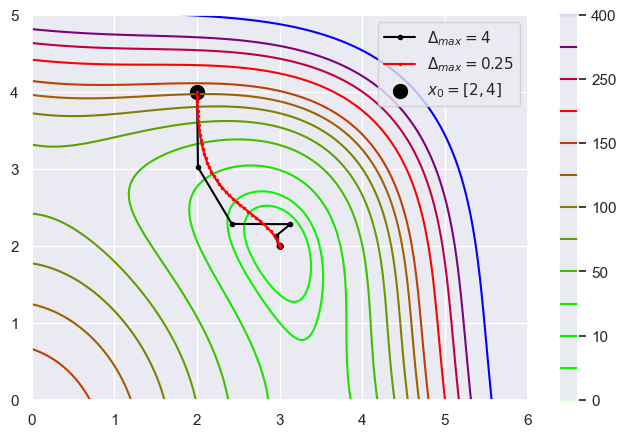

In [5]:
x0 = np.array([2.,4.], dtype = float)
tol = (len(x0)*eps)**(1/2)
print("PUNTO INICIAL:  ", x0)
print("")
k, xk, gk, ind, M1 = REG_CONF_CAUCHY(f = f_Himmelblau, gradf = grad_Himmelblau,
                        Hessf = Hess_Himmelblau, xk = x0, maxiter = N,
                        tol = tol, Dmax = Dmax1, Dmin = Dmin, eta = eta)
print("DELTA_MAX:      ", Dmax1)
print("ITERACIONES:    ", k)
print("xk:             ", xk)
print("f(xk):          ", f_Himmelblau(xk))
print("||gradf(xk)||:  ", np.linalg.norm(gk))
print("INDICADORA:     ", ind)

print("")
k, xk, gk, ind, M2 = REG_CONF_CAUCHY(f = f_Himmelblau, gradf = grad_Himmelblau,
                        Hessf = Hess_Himmelblau, xk = x0, maxiter = N,
                        tol = tol, Dmax = Dmax2, Dmin = Dmin, eta = eta)
print("DELTA_MAX:      ", Dmax2)
print("ITERACIONES:    ", k)
print("xk:             ", xk)
print("f(xk):          ", f_Himmelblau(xk))
print("||gradf(xk)||:  ", np.linalg.norm(gk))
print("INDICADORA:     ", ind)

ax = contornosFnc2D(f_Himmelblau, xleft=0, xright=6, ybottom=0, ytop=5,
            levels=[0, 5, 10, 25, 50, 75, 100, 125, 150, 200, 250, 300, 400],
            secuencia1 = M1, secuencia2=M2)
ax.scatter(2,4, s = 100, c = '#000000', label = r"$x_{0} = [2,4]$")
plt.legend()
plt.show()

**Función de Beale**
- $\mathbf{x}_0 = (2,3)$ 

PUNTO INICIAL:   [2. 3.]

DELTA_MAX:       4
ITERACIONES:     457
xk:              [2.99999994 0.49999998]
f(xk):           5.871176634666552e-16
||gradf(xk)||:   1.964491973262716e-08
INDICADORA:      True

DELTA_MAX:       0.25
ITERACIONES:     962
xk:              [2.99999994 0.49999999]
f(xk):           5.552970357295272e-16
||gradf(xk)||:   2.0880375913684464e-08
INDICADORA:      True


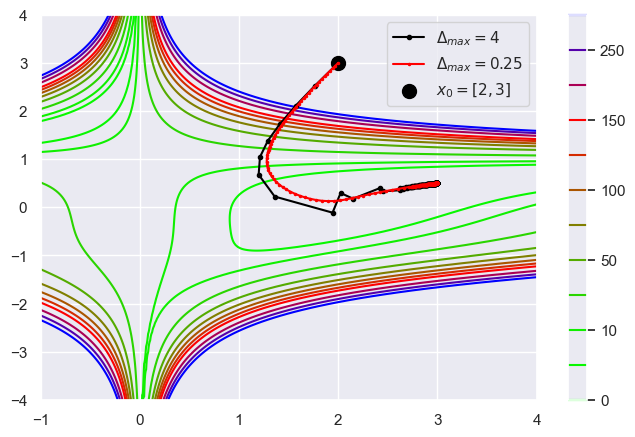

In [6]:
x0 = np.array([2.,3.], dtype = float)
tol = (len(x0)*eps)**(1/2)
print("PUNTO INICIAL:  ", x0)
print("")
k, xk, gk, ind, M1 = REG_CONF_CAUCHY(f = f_Beale, gradf = grad_Beale,
                        Hessf = Hess_Beale, xk = x0, maxiter = N,
                        tol = tol, Dmax = Dmax1, Dmin = Dmin, eta = eta)
print("DELTA_MAX:      ", Dmax1)
print("ITERACIONES:    ", k)
print("xk:             ", xk)
print("f(xk):          ", f_Beale(xk))
print("||gradf(xk)||:  ", np.linalg.norm(gk))
print("INDICADORA:     ", ind)

print("")
k, xk, gk, ind, M2 = REG_CONF_CAUCHY(f = f_Beale, gradf = grad_Beale,
                        Hessf = Hess_Beale, xk = x0, maxiter = N,
                        tol = tol, Dmax = Dmax2, Dmin = Dmin, eta = eta)
print("DELTA_MAX:      ", Dmax2)
print("ITERACIONES:    ", k)
print("xk:             ", xk)
print("f(xk):          ", f_Beale(xk))
print("||gradf(xk)||:  ", np.linalg.norm(gk))
print("INDICADORA:     ", ind)

ax = contornosFnc2D(f_Beale, xleft=-1, xright=4, ybottom=-4, ytop=4,
            levels=[0, 5, 10, 25, 50, 75, 100, 125, 150, 200, 250, 300],
            secuencia1 = M1, secuencia2=M2)
ax.scatter(2,3, s = 100, c = '#000000', label = r"$x_{0} = [2,3]$")
plt.legend()
plt.show()

**Función de Rosenbrock**
- $\mathbf{x}_0 = (-1.2, 1.0)\in \mathbb{R}^{2}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{10}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{20}$ 

PUNTO INICIAL:   [-1.2  1. ]

DELTA_MAX:       4
ITERACIONES:     11701
xk:              [0.99999998 0.99999996]
f(xk):           4.583825421693544e-16
||gradf(xk)||:   2.1047742325582866e-08
INDICADORA:      True

DELTA_MAX:       0.25
ITERACIONES:     16902
xk:              [0.99999998 0.99999996]
f(xk):           3.6512299805370005e-16
||gradf(xk)||:   2.1046579364845676e-08
INDICADORA:      True


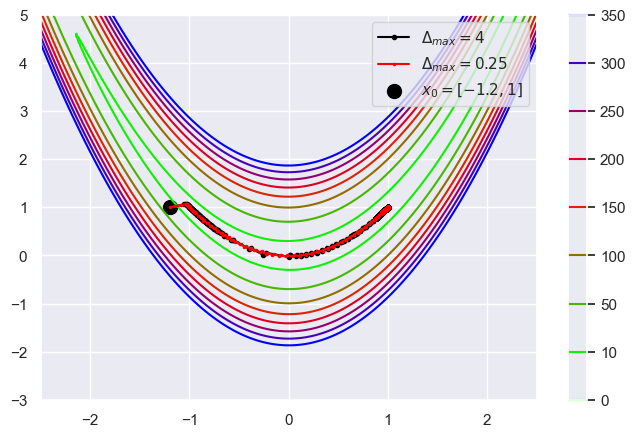

In [7]:
x0 = np.array([-1.2, 1.0], dtype = float)
tol = (len(x0)*eps)**(1/2)
print("PUNTO INICIAL:  ", x0)
print("")
k, xk, gk, ind, M1 = REG_CONF_CAUCHY(f = f_Rosenbrock, gradf = grad_Rosenbrock,
                        Hessf = Hess_Rosenbrock, xk = x0, maxiter = N,
                        tol = tol, Dmax = Dmax1, Dmin = Dmin, eta = eta)
print("DELTA_MAX:      ", Dmax1)
print("ITERACIONES:    ", k)
print("xk:             ", xk)
print("f(xk):          ", f_Rosenbrock(xk))
print("||gradf(xk)||:  ", np.linalg.norm(gk))
print("INDICADORA:     ", ind)

print("")
k, xk, gk, ind, M2 = REG_CONF_CAUCHY(f = f_Rosenbrock, gradf = grad_Rosenbrock,
                        Hessf = Hess_Rosenbrock, xk = x0, maxiter = N,
                        tol = tol, Dmax = Dmax2, Dmin = Dmin, eta = eta)
print("DELTA_MAX:      ", Dmax2)
print("ITERACIONES:    ", k)
print("xk:             ", xk)
print("f(xk):          ", f_Rosenbrock(xk))
print("||gradf(xk)||:  ", np.linalg.norm(gk))
print("INDICADORA:     ", ind)

ax = contornosFnc2D(f_Rosenbrock, xleft=-2.5, xright=2.5, ybottom=-3, ytop=5,
            levels=[0, 10, 50, 100, 150, 200, 250, 300, 350],
            secuencia1 = M1, secuencia2 = M2)
ax.scatter(-1.2, 1.0, s = 100, c = '#000000', label = r"$x_{0} = [-1.2,1]$")
plt.legend()
plt.show()

In [8]:
x0 = np.array([-1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0], dtype = float)
tol = (len(x0)*eps)**(1/2)
print("PUNTO INICIAL:  ", x0)
print("")
k, xk, gk, ind, M = REG_CONF_CAUCHY(f = f_Rosenbrock, gradf = grad_Rosenbrock,
                        Hessf = Hess_Rosenbrock, xk = x0, maxiter = N,
                        tol = tol, Dmax = Dmax1, Dmin = Dmin, eta = eta)
print("DELTA_MAX:      ", Dmax1)
print("ITERACIONES:    ", k)
print("xk:             ", xk)
print("f(xk):          ", f_Rosenbrock(xk))
print("||gradf(xk)||:  ", np.linalg.norm(gk))
print("INDICADORA:     ", ind)
print("")
k, xk, gk, ind, M = REG_CONF_CAUCHY(f = f_Rosenbrock, gradf = grad_Rosenbrock,
                        Hessf = Hess_Rosenbrock, xk = x0, maxiter = N,
                        tol = tol, Dmax = Dmax2, Dmin = Dmin, eta = eta)
print("DELTA_MAX:      ", Dmax2)
print("ITERACIONES:    ", k)
print("xk:             ", xk)
print("f(xk):          ", f_Rosenbrock(xk))
print("||gradf(xk)||:  ", np.linalg.norm(gk))
print("INDICADORA:     ", ind)

PUNTO INICIAL:   [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1. ]

DELTA_MAX:       4
ITERACIONES:     28797
xk:              [1.         1.         1.         1.         1.         1.
 0.99999999 0.99999998 0.99999997 0.99999994]
f(xk):           1.236196490405799e-15
||gradf(xk)||:   4.710567811616958e-08
INDICADORA:      True

DELTA_MAX:       0.25
ITERACIONES:     22485
xk:              [1.         1.         1.         1.         1.         1.
 0.99999999 0.99999998 0.99999996 0.99999993]
f(xk):           1.636995753004429e-15
||gradf(xk)||:   4.711196502875113e-08
INDICADORA:      True


In [9]:
x0 = np.array([-1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0], dtype = float)
tol = (len(x0)*eps)**(1/2)
print("PUNTO INICIAL:  ", x0)
print("")
k, xk, gk, ind, M = REG_CONF_CAUCHY(f = f_Rosenbrock, gradf = grad_Rosenbrock,
                        Hessf = Hess_Rosenbrock, xk = x0, maxiter = N,
                        tol = tol, Dmax = Dmax1, Dmin = Dmin, eta = eta)
print("DELTA_MAX:      ", Dmax1)
print("ITERACIONES:    ", k)
print("xk:             ", xk)
print("f(xk):          ", f_Rosenbrock(xk))
print("||gradf(xk)||:  ", np.linalg.norm(gk))
print("INDICADORA:     ", ind)
print("")
k, xk, gk, ind, M = REG_CONF_CAUCHY(f = f_Rosenbrock, gradf = grad_Rosenbrock,
                        Hessf = Hess_Rosenbrock, xk = x0, maxiter = N,
                        tol = tol, Dmax = Dmax2, Dmin = Dmin, eta = eta)
print("DELTA_MAX:      ", Dmax2)
print("ITERACIONES:    ", k)
print("xk:             ", xk)
print("f(xk):          ", f_Rosenbrock(xk))
print("||gradf(xk)||:  ", np.linalg.norm(gk))
print("INDICADORA:     ", ind)

PUNTO INICIAL:   [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.
 -1.2  1.  -1.2  1.  -1.2  1. ]

DELTA_MAX:       4
ITERACIONES:     25722
xk:              [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99999999 0.99999999 0.99999998
 0.99999995 0.9999999 ]
f(xk):           3.0888053179060632e-15
||gradf(xk)||:   6.661956912816292e-08
INDICADORA:      True

DELTA_MAX:       0.25
ITERACIONES:     29979
xk:              [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99999999 0.99999999 0.99999998
 0.99999996 0.99999991]
f(xk):           2.534991870636599e-15
||gradf(xk)||:   6.656908619807533e-08
INDICADORA:      True


**Función de Hartmann de dimensión 6**
- $\mathbf{x}_0 = (0,0,0,0,0,0)$ 

In [10]:
x0 = np.array([0,0,0,0,0,0], dtype = float)
tol = len(x0)**(1/2)*eps**(1/3)
print("PUNTO INICIAL:  ", x0)
print("")
k, xk, gk, ind, M = REG_CONF_CAUCHY(f = f_Hartman, gradf = grad_Hartman,
                        Hessf = Hess_Hartman, xk = x0, maxiter = N,
                        tol = tol, Dmax = Dmax1, Dmin = Dmin, eta = eta)
print("DELTA_MAX:      ", Dmax1)
print("ITERACIONES:    ", k)
print("xk:             ", xk)
print("f(xk):          ", f_Hartman(xk))
print("||gradf(xk)||:  ", np.linalg.norm(gk))
print("INDICADORA:     ", ind)

print("")
k, xk, gk, ind, M = REG_CONF_CAUCHY(f = f_Hartman, gradf = grad_Hartman,
                        Hessf = Hess_Hartman, xk = x0, maxiter = N,
                        tol = tol, Dmax = Dmax2, Dmin = Dmin, eta = eta)
print("DELTA_MAX:      ", Dmax2)
print("ITERACIONES:    ", k)
print("xk:             ", xk)
print("f(xk):          ", f_Hartman(xk))
print("||gradf(xk)||:  ", np.linalg.norm(gk))
print("INDICADORA:     ", ind)

PUNTO INICIAL:   [0. 0. 0. 0. 0. 0.]

DELTA_MAX:       4
ITERACIONES:     42
xk:              [0.20168976 0.15001054 0.47687315 0.27533248 0.31165144 0.65730054]
f(xk):           -3.0424577378388036
||gradf(xk)||:   1.1347828196521737e-05
INDICADORA:      True

DELTA_MAX:       0.25
ITERACIONES:     38
xk:              [0.20168985 0.15001049 0.47687285 0.2753325  0.31165148 0.65730055]
f(xk):           -3.0424577378360285
||gradf(xk)||:   1.2414013090726704e-05
INDICADORA:      True
